<a href="https://colab.research.google.com/github/alinespereira/SME0823-202502-Avaliacao-2/blob/main/SME0823_Avalia%C3%A7%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Aline da Silva Pereira

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [52]:
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


# Bibliotecas utilizadas

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carga dos dados

In [54]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze5.csv',
    index_col=0
)
df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805
...,...,...,...,...,...,...
845,30,0,1,1,33.0,72.282306
846,4,1,1,0,29.0,31.734540
847,50,0,1,0,29.0,134.725193
848,29,0,0,0,41.0,75.382218


In [55]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [56]:
df.describe(percentiles=[.001, .01, .05, .25, .5, .75, .95, .99, .999]).T.round(3)

,count,mean,std,min,0.1%,1%,5%,25%,50%,75%,95%,99%,99.9%,max
nsneeze,850.0,45.226,145.955,0.000,0.849,1.000,3.000,9.000,18.000,37.000,134.100,545.20,2026.907,3179.000
alcohol,850.0,0.408,0.492,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.00,1.000,1.000
antihist,850.0,0.271,0.445,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.00,1.000,1.000
smoker,850.0,0.188,0.391,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.00,1.000,1.000
age,850.0,31.259,11.662,18.000,18.000,18.000,18.000,19.000,30.000,39.000,52.000,62.00,74.906,80.000
pollen,850.0,59.425,31.023,6.877,7.317,11.887,18.112,36.914,54.628,76.149,120.427,149.84,190.523,210.301


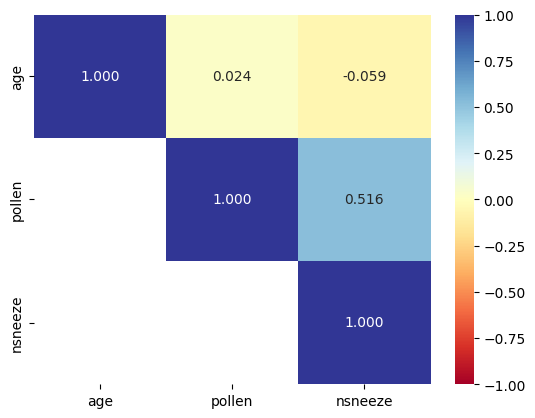

In [57]:
fig, ax = plt.subplots()

correlations = df[["age", "pollen", "nsneeze"]].corr()
mask = np.tril(np.ones_like(correlations.values), k=-1)

_ = sns.heatmap(
    data=correlations,
    ax=ax,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.03f',
    cmap="RdYlBu",
    mask=mask,
)

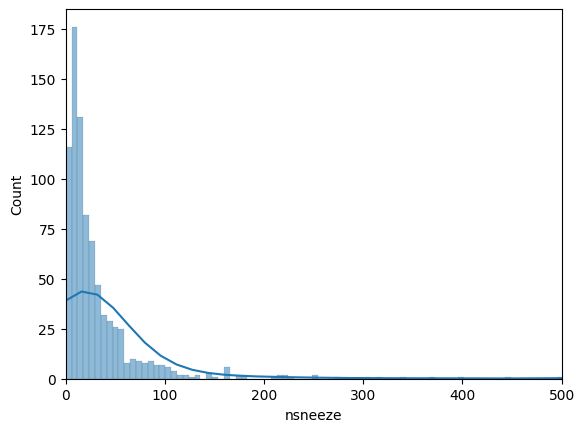

In [58]:
fig, ax = plt.subplots()

sns.histplot(data=df, x='nsneeze', kde=True, ax=ax)
_ = ax.set_xlim(0, 500)

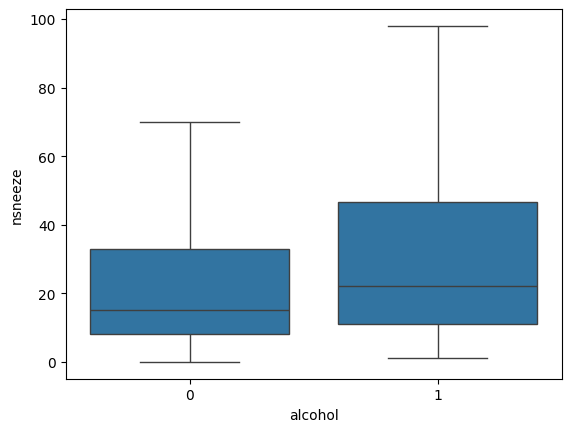

In [59]:
fig, ax = plt.subplots()

_ = sns.boxplot(data=df, x='alcohol', y='nsneeze', showfliers=False, ax=ax)

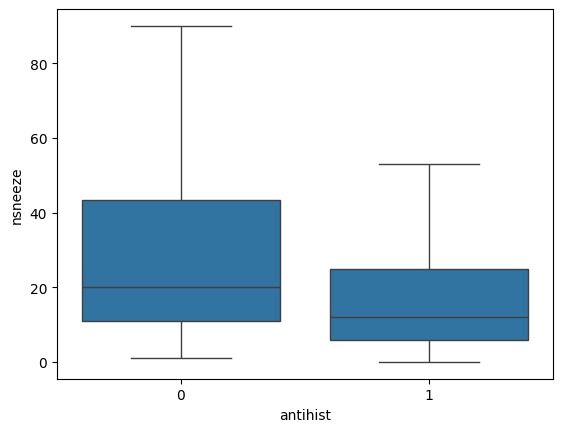

In [60]:
fig, ax = plt.subplots()

_ = sns.boxplot(data=df, x='antihist', y='nsneeze', showfliers=False, ax=ax)

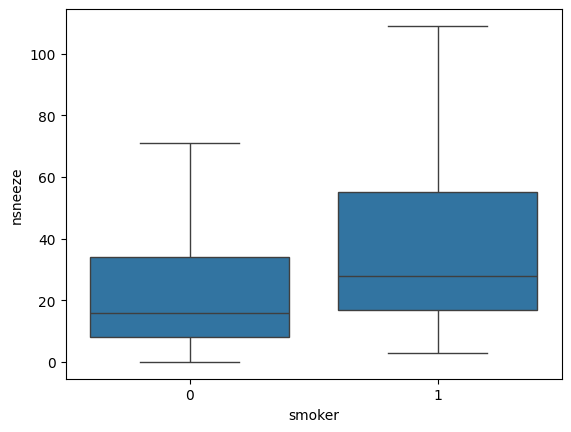

In [61]:
fig, ax = plt.subplots()

_ = sns.boxplot(data=df, x='smoker', y='nsneeze', showfliers=False, ax=ax)

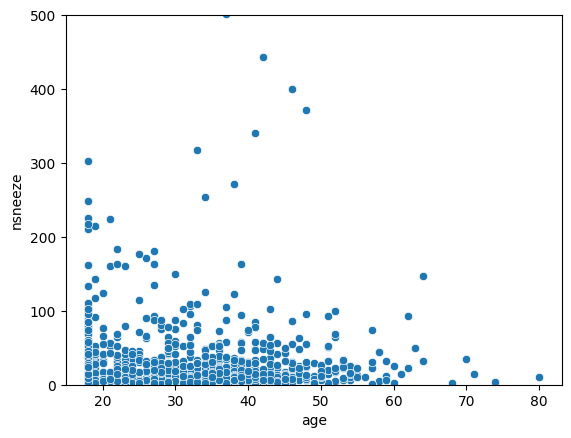

In [62]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='age', y='nsneeze', ax=ax)
_ = ax.set_ylim(0, 500)

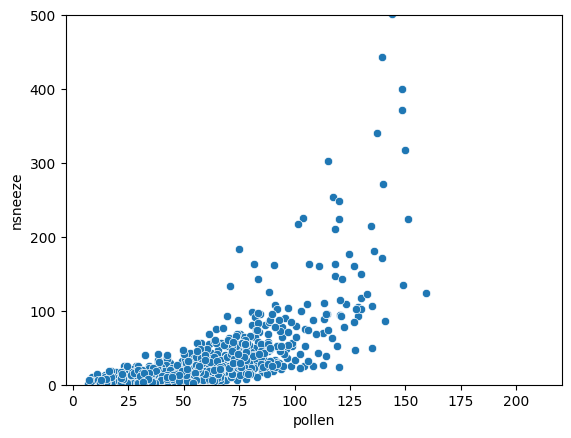

In [63]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='pollen', y='nsneeze', ax=ax)
_ = ax.set_ylim(0, 500)

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [64]:
def envelope_poisson(fitted_model, X, title, **fig_kwds):
    fig, ax = plt.subplots(**fig_kwds)

    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    obs = range(len(sorted_resid))
    sns.scatterplot(x=obs, y=sorted_resid, label="Resíduos observados", ax=ax)
    sns.lineplot(x=obs, y=lower, color="red", linestyle="--", linewidth=1, label="banda 2.5%")
    sns.lineplot(x=obs, y=upper, color="red", linestyle="--", linewidth=1, label="banda 97.5%")
    ax.set_title(title)
    ax.set_xlabel("Ordem dos resíduos")
    ax.set_ylabel("Resíduo componente do desvio")
    ax.legend()
    ax.grid(True)

    return fig, ax

In [65]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [66]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

In [67]:
modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary2())

                Results: Generalized linear model
Model:                GLM              AIC:            10499.0656
Link Function:        Log              BIC:            723.8816  
Dependent Variable:   nsneeze          Log-Likelihood: -5243.5   
Date:                 2025-12-01 20:26 LL-Null:        -45581.   
No. Observations:     850              Deviance:       6416.9    
Df Model:             5                Pearson chi2:   6.61e+03  
Df Residuals:         844              Scale:          1.0000    
Method:               IRLS                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         1.5704   0.0212  74.1033 0.0000  1.5288  1.6119
C(alcohol)[T.1]   0.3477   0.0107  32.6354 0.0000  0.3268  0.3686
C(antihist)[T.1] -0.5969   0.0147 -40.6780 0.0000 -0.6257 -0.5682
C(smoker)[T.1]    0.6700  


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


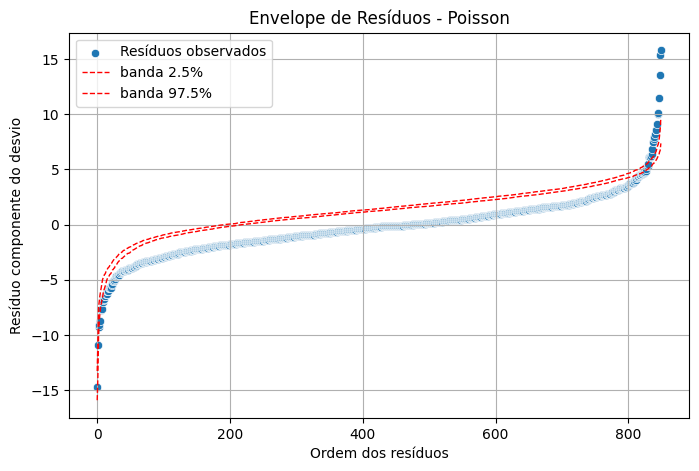

In [68]:
fig, ax = envelope_poisson(
    ajuste_pois,
    preditoras,
    "Envelope de Resíduos - Poisson",
    figsize=(8, 5),
)

In [69]:
phi = ajuste_pois.deviance / ajuste_pois.df_resid
phi

np.float64(7.602915944625351)

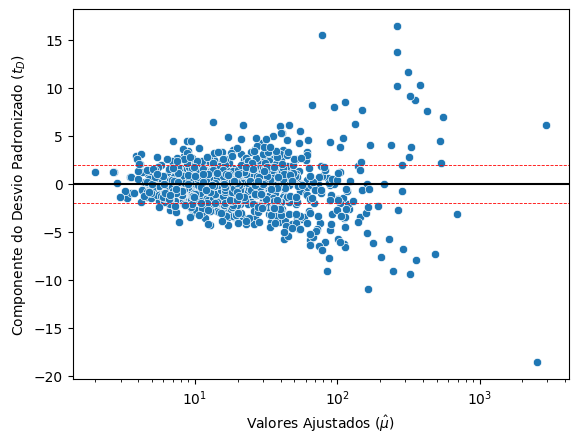

In [70]:
fig, ax = plt.subplots()

mu = ajuste_pois.fittedvalues
influence = ajuste_pois.get_influence()

h = influence.hat_matrix_diag

tD = ajuste_pois.resid_deviance / np.sqrt(1 - h)

sns.scatterplot(x=mu, y=tD)
ax.axhline(0, color='black')
ax.axhline(stats.norm.ppf(.025), color='red', linestyle='--', linewidth=0.6)
ax.axhline(stats.norm.ppf(.975), color='red', linestyle='--', linewidth=0.6)
ax.set_xlabel(r"Valores Ajustados $(\hat{\mu})$")
ax.set_ylabel("Componente do Desvio Padronizado $(t_D)$")
_ = ax.set_xscale("log")

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [71]:
alpha_fixado = 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary2())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                Results: Generalized linear model
Model:                GLM              AIC:            6297.1894 
Link Function:        Log              BIC:            -4915.8846
Dependent Variable:   nsneeze          Log-Likelihood: -3142.6   
Date:                 2025-12-01 20:26 LL-Null:        -5905.5   
No. Observations:     850              Deviance:       777.09    
Df Model:             5                Pearson chi2:   752.      
Df Residuals:         844              Scale:          1.0000    
Method:               IRLS                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         1.4942   0.0635  23.5184 0.0000  1.3697  1.6187
C(alcohol)[T.1]   0.3834   0.0355  10.8023 0.0000  0.3138  0.4530
C(antihist)[T.1] -0.5992   0.0407 -14.7309 0.0000 -0.6789 -0.5195
C(smoker)[T.1]    0.5612  

In [72]:
def envelope_negbin(fitted_model, title, **fig_kwds):
    fig, ax = plt.subplots(**fig_kwds)

    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    obs = range(len(sorted_resid))
    sns.scatterplot(x=obs, y=sorted_resid, label="Resíduos observados", ax=ax)
    sns.lineplot(x=obs, y=lower, color="red", linestyle="--", linewidth=1, label="banda 2.5%")
    sns.lineplot(x=obs, y=upper, color="red", linestyle="--", linewidth=1, label="banda 97.5%")
    ax.set_title(title)
    ax.set_xlabel("Ordem dos resíduos")
    ax.set_ylabel("Resíduo componente do desvio")
    ax.legend()
    ax.grid(True)

    return fig, ax

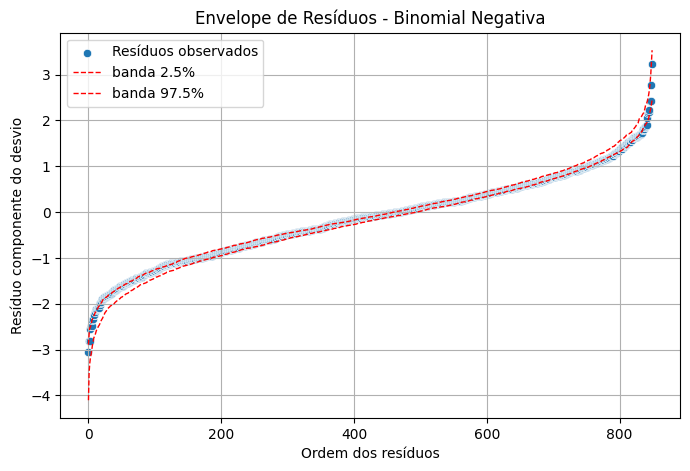

In [73]:
fig, ax = envelope_negbin(
    ajuste_nb,
    title="Envelope de Resíduos - Binomial Negativa",
    figsize=(8, 5)
)

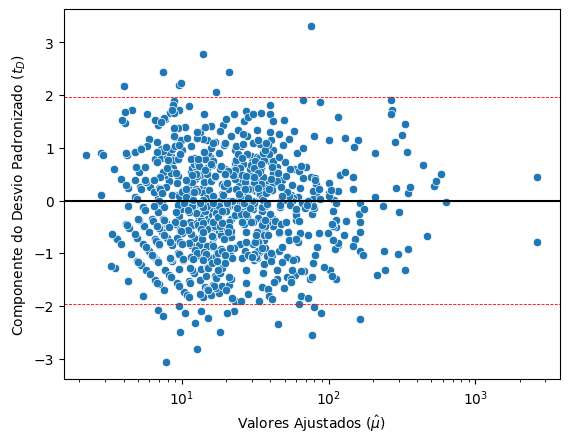

In [74]:
fig, ax = plt.subplots()

mu = ajuste_nb.fittedvalues
influence = ajuste_nb.get_influence()

h = influence.hat_matrix_diag

tD = ajuste_nb.resid_deviance / np.sqrt(1 - h)

sns.scatterplot(x=mu, y=tD)
ax.axhline(0, color='black')
ax.axhline(stats.norm.ppf(.025), color='red', linestyle='--', linewidth=0.6)
ax.axhline(stats.norm.ppf(.975), color='red', linestyle='--', linewidth=0.6)
ax.set_xlabel(r"Valores Ajustados $(\hat{\mu})$")
ax.set_ylabel("Componente do Desvio Padronizado $(t_D)$")
_ = ax.set_xscale("log")



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [76]:
print(ajuste_nb.get_margeff(at='overall').summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     17.0874      1.764      9.684      0.000      13.629      20.546
C(antihist)[T.1]   -26.7061      2.132    -12.525      0.000     -30.885     -22.527
C(smoker)[T.1]      25.0117      2.188     11.429      0.000      20.723      29.301
age                 -0.4507      0.071     -6.379      0.000      -0.589      -0.312
pollen               1.3398      0.065     20.585      0.000       1.212       1.467


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [79]:
(
    preditoras_treino,
    preditoras_teste,
    resposta_treino,
    resposta_teste
) = train_test_split(preditoras, resposta, test_size=.2, random_state=42)

In [93]:
modelo_pois_predicao = sm.GLM(
    resposta_treino,
    preditoras_treino,
    family=sm.families.Poisson()
)
ajuste_pois_predicao = modelo_pois_predicao.fit()
print(ajuste_pois_predicao.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            11905.9246
Link Function:      Log              BIC:            4226.8030 
Dependent Variable: nsneeze          Log-Likelihood: -5948.0   
Date:               2025-12-01 20:51 LL-Null:        -35089.   
No. Observations:   680              Deviance:       8629.2    
Df Model:           4                Pearson chi2:   1.09e+04  
Df Residuals:       675              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
alcohol     0.4186    0.0124   33.8357  0.0000   0.3944   0.4429
antihist   -0.3981    0.0166  -23.9186  0.0000  -0.4307  -0.3654
smoker      0.8681    0.0126   68.9309  0.0000   0.8434   0.8928
age         0.0109    0.0003   31.3387  0.0000   

In [94]:
pois_predicao = ajuste_pois_predicao.predict(preditoras_teste)
pois_eam = mean_absolute_error(y_pred=pois_predicao, y_true=resposta_teste)
pois_eqm = mean_squared_error(y_pred=pois_predicao, y_true=resposta_teste)
pois_eam, pois_eqm

(28.683205718567393, 38204.189521032145)

In [91]:
modelo_nb_predicao = sm.GLM(
    resposta_treino,
    preditoras_treino,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)
ajuste_nb_predicao = modelo_nb_predicao.fit()
print(ajuste_nb_predicao.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            5498.9881 
Link Function:      Log              BIC:            -3339.4748
Dependent Variable: nsneeze          Log-Likelihood: -2744.5   
Date:               2025-12-01 20:51 LL-Null:        -4674.8   
No. Observations:   680              Deviance:       1062.9    
Df Model:           4                Pearson chi2:   1.31e+03  
Df Residuals:       675              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
alcohol     0.5610    0.0394   14.2228  0.0000   0.4837   0.6384
antihist   -0.4725    0.0465  -10.1560  0.0000  -0.5637  -0.3813
smoker      0.7533    0.0469   16.0587  0.0000   0.6614   0.8452
age         0.0149    0.0012   12.4540  0.0000   

In [92]:
nb_predicao = ajuste_nb_predicao.predict(preditoras_teste)
nb_eam = mean_absolute_error(y_pred=nb_predicao, y_true=resposta_teste)
nb_eqm = mean_squared_error(y_pred=nb_predicao, y_true=resposta_teste)
nb_eam, nb_eqm

(62.19077174119242, 282259.7856909076)

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [96]:
df['pollen'].quantile(.95)

np.float64(120.42669339601152)

In [102]:
individuo_a = pd.DataFrame([
    {
        "alcohol": 0,
        "antihist": 1,
        "smoker": 0,
        "age": 30,
        "pollen": df['pollen'].quantile(.05)
    }
])

In [103]:
ajuste_nb_predicao.predict(individuo_a)

,0
0,1.945749


In [104]:
individuo_b = pd.DataFrame([
    {
        "alcohol": 1,
        "antihist": 0,
        "smoker": 1,
        "age": 50,
        "pollen": df['pollen'].quantile(.95)
    }
])

In [105]:
ajuste_nb_predicao.predict(individuo_b)

,0
0,780.070971
